<a href="https://colab.research.google.com/github/Chengeng-Yang/ML_projects/blob/main/BMEresult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()   # 

import h5py
fid = h5py.File('dataset_patchcamelyon.h5', 'r')
X, Y = fid['X'][:], fid['Y'][:]
X = X / 255.
fid.close()

Saving dataset_patchcamelyon.h5 to dataset_patchcamelyon.h5


In [ ]:
from sklearn.model_selection import train_test_split
x=X.reshape(2500,-1)
y=Y.reshape(2500,-1)

import numpy as np  
import matplotlib
import matplotlib.pyplot as plt

shuffle_index=np.random.permutation(2500)
x,y=x[shuffle_index],y[shuffle_index]

xtrain,x_test,ytrain,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
x_train,x_val,y_train,y_val=train_test_split(xtrain,ytrain,test_size=0.2,random_state=36)

x_train=x_train.reshape(-1,96,96,3)
x_val=x_val.reshape(-1,96,96,3)
x_test=x_test.reshape(-1,96,96,3)

In [ ]:
import tensorflow as tf
from tensorflow import keras



cnn4 = keras.models.Sequential()
cnn4.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=2,activation="relu", padding="same", input_shape=[96,96,3]))
cnn4.add(keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="same"))

cnn4.add(keras.layers.Conv2D(filters=128, kernel_size=1, strides=1,activation="relu", padding="same"))
cnn4.add(keras.layers.Conv2D(filters=128, kernel_size=4, strides=1,activation="relu", padding="same"))
cnn4.add(keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="same"))


cnn4.add(keras.layers.Conv2D(filters=128, kernel_size=4, strides=1,activation="relu", padding="same"))
cnn4.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=2,activation="relu", padding="same"))
cnn4.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=1, padding="same"))


cnn4.add(keras.layers.Conv2D(filters=128, kernel_size=1, strides=1,activation="relu", padding="same"))
cnn4.add(keras.layers.Conv2D(filters=256, kernel_size=2, strides=1,activation="relu", padding="same"))
cnn4.add(keras.layers.Dropout(0.25))


cnn4.add(keras.layers.Flatten())
cnn4.add(keras.layers.BatchNormalization())
cnn4.add(keras.layers.Dense(100, activation="relu",kernel_initializer='he_normal')) 
cnn4.add(keras.layers.Dropout(0.25))
cnn4.add(keras.layers.BatchNormalization())
cnn4.add(keras.layers.Dense(100, activation="relu",kernel_initializer='he_normal')) 
cnn4.add(keras.layers.Dropout(0.25))
cnn4.add(keras.layers.Dense(2, activation="softmax"))

# change kernel initializer

earlystop_cnn = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=20, restore_best_weights=True)
# NADAM 82-84% ACCURACY
# ADADELTA VERY LOW
# ADAGRAD VERY LOW
# RMS PROP  80% 82%
# SGD very low, nesterove true or not


nadam = keras.optimizers.Nadam(learning_rate=0.0001)
cnn4.compile(loss="sparse_categorical_crossentropy",optimizer=nadam,metrics=["accuracy"])
n_epochs = 100
training_cnn4 = cnn4.fit(x_train, y_train, epochs = n_epochs,
                           validation_data = (x_val, y_val),
                           callbacks=[earlystop_cnn])

cnn4.evaluate(x_val,y_val)
cnn4.evaluate(x_test,y_test)
# error analysis and performance
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score, f1_score 




# CNN best 
# input: x_train,y_train,x_val,y_val,x_test,y_test


cnnprd=cnn4.predict_classes(x_test)
CM1 = confusion_matrix(y_test, cnnprd)
CM1 = CM1.astype('float') / CM1.sum(axis=1)[:, np.newaxis]   
#np.fill_diagonal(CM1,0)

plt.matshow(CM1, cmap=plt.cm.coolwarm)
plt.title('CNN best model')
plt.tight_layout
plt.colorbar()
plt.show()






print('accuracy cnn',accuracy_score(y_test, cnnprd))

print('precision cnn',precision_score(y_test, cnnprd,average='weighted'))

print('recall cnn',recall_score(y_test, cnnprd,average='weighted'))

print('f1 cnn',f1_score(y_test, cnnprd,average='weighted'))



Epoch 1/100
50/50 [==============================] - 3s 26ms/step - loss: 1.0096 - accuracy: 0.5126 - val_loss: 0.6929 - val_accuracy: 0.4875
Epoch 2/100
50/50 [==============================] - 1s 20ms/step - loss: 0.8092 - accuracy: 0.6139 - val_loss: 0.6767 - val_accuracy: 0.7625
Epoch 3/100
50/50 [==============================] - 1s 20ms/step - loss: 0.6551 - accuracy: 0.6957 - val_loss: 0.6516 - val_accuracy: 0.7075
Epoch 4/100
50/50 [==============================] - 1s 20ms/step - loss: 0.5962 - accuracy: 0.7333 - val_loss: 0.7023 - val_accuracy: 0.4875
Epoch 5/100
50/50 [==============================] - 1s 20ms/step - loss: 0.6451 - accuracy: 0.7024 - val_loss: 0.6500 - val_accuracy: 0.5075
Epoch 6/100
50/50 [==============================] - 1s 20ms/step - loss: 0.5360 - accuracy: 0.7494 - val_loss: 0.5522 - val_accuracy: 0.7375
Epoch 7/100
50/50 [==============================] - 1s 20ms/step - loss: 0.5233 - accuracy: 0.7765 - val_loss: 0.5822 - val_accuracy: 0.6500
Epoch 

[0.9905393123626709, 0.8199999928474426]

In [ ]:
import tensorflow as tf
from tensorflow import keras



avepool=tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid')

x2_train,x2_test = avepool(x_train),avepool(x_test)


In [ ]:
x2_train,x2_test=np.asarray(x2_train),np.asarray(x2_test)

x2_train,x2_test=x2_train.reshape(1600,-1),x2_test.reshape(500,-1) 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create the optimal classifier
clf1_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = 351, #RF["n_estimators"],
                              max_depth = 302, #RF["max_depth"],
                              min_samples_leaf = 1, #RF["min_samples_leaf"]
                              )

# Predict on test data
clf1_opt.fit(x2_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=302, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=351,
                       n_jobs=-1, oob_score=False, random_state=36, verbose=0,
                       warm_start=False)

In [ ]:
#avg pooling
y2pred1=clf1_opt.predict(x2_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score
print(accuracy_score(y_test,y2pred1))
print(precision_score(y_test,y2pred1))
print(recall_score(y_test,y2pred1))
print(f1_score(y_test,y2pred1))


# RF
# input: 

CM3 = confusion_matrix(y_test,y2pred1)
CM3 = CM3.astype('float') / CM3.sum(axis=1)[:, np.newaxis]   
#np.fill_diagonal(CM3,0)

plt.matshow(CM3, cmap=plt.cm.coolwarm)
plt.title('random forest best model')
plt.tight_layout
plt.colorbar()
plt.show()



ValueError: ignored

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


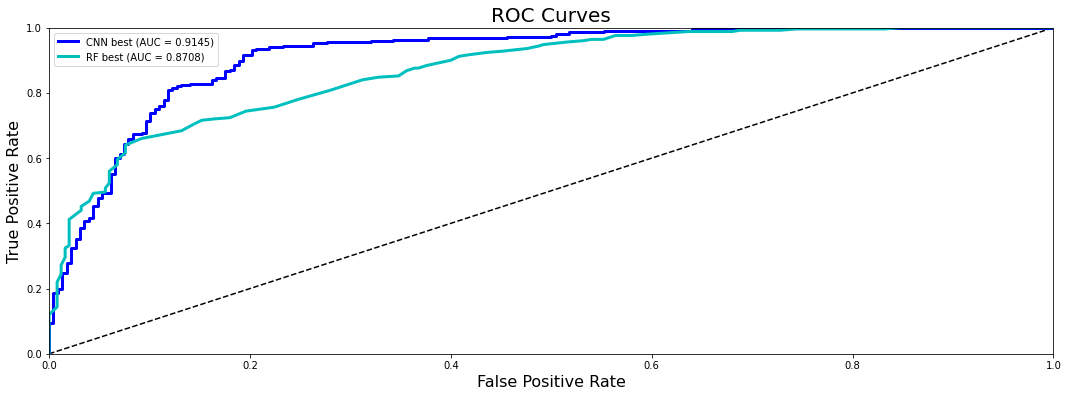

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc


## compare the average ROC curves
plt.figure(1, figsize=(18, 6))
plt.clf()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curves', fontsize=20)
fpr_m = np.linspace(0, 1, 100)

for i in range(1,3):
    if (i==1):
        classifier_cnn = cnn4.predict_proba(x_test)
        label = 'CNN best'
        colorval = 'b'
    if (i==2):
        classifier_rf = clf1_opt.predict_proba(x2_test)
        label = 'RF best'
        colorval = 'c'


    if (i==1):
      f,t,thre=roc_curve(y_test,classifier_cnn[:,1])
      auc_cnn=roc_auc_score(y_test,classifier_cnn[:,1])
      plt.plot(f, t, color=colorval, 
             label=r'%s (AUC = %0.4f)' % (label, auc_cnn), linewidth=3)
      
    if (i==2):
      f1,t1,thre1=roc_curve(y_test,classifier_rf[:,1])
      auc_rf=roc_auc_score(y_test,classifier_rf[:,1])
      plt.plot(f1,t1, color=colorval, 
             label=r'%s (AUC = %0.4f)' % (label, auc_rf), linewidth=3)



plt.legend()
plt.show()

In [ ]:
#no dimension reduction
#redo spliting, use x0_train instead

shuffle_index=np.random.permutation(2500)
x,y=x[shuffle_index],y[shuffle_index]

x0train,x0_test,y0train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #scikilearn
x0_train,x0_val,y0_train,y0_val=train_test_split(x0train,y0train,test_size=0.2,random_state=36)

y0_train,y0_test=y0_train.reshape(1600,),y_test.reshape(500,) 
#scikilearn: x0train,x0_test,y0train,y0_test, for direct processing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create the optimal classifier
clfo1_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = 301, #RFo["n_estimators"],
                              max_depth = 527, #RFo["max_depth"],
                              min_samples_leaf = 1, #RFo["min_samples_leaf"]
                              )

# Predict on test data
clfo1_opt.fit(x0_train, y0_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=527, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=301,
                       n_jobs=-1, oob_score=False, random_state=36, verbose=0,
                       warm_start=False)

In [ ]:
y0pred1=clfo1_opt.predict(x0_test)
print(accuracy_score(y0_test,y0pred1))
print(precision_score(y0_test,y0pred1))
print(recall_score(y0_test,y0pred1))
print(f1_score(y0_test,y0pred1))

0.772
0.8049645390070922
0.7937062937062938
0.7992957746478873


In [ ]:
ypred1_proba = cnn4.predict_proba(x_test)
classifier = clf1_opt.predict_proba(x2_test)

In [ ]:
ytest0_b = label_binarize(ytest0, classes=np.arange(0, 26)) # ytest0 has values 1 through 2 (digits)
ytest0_b.shape

In [ ]:
# compute average ROC curves using ovr strategy

from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

plt.figure(1, figsize=(20, 14))
plt.clf()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Average ROC Curves', fontsize=20)

Fpr_mean = np.linspace(0, 1, 100)
for i in range(0,2):
    if (i==0):
        labeltype = 'CNN'
        colortype = 'g'
        ypred_proba = ypred1_proba
        
    if (i==1):
        labeltype = 'Random Forest'
        colortype = 'b'
        ypred_proba = ypred2_proba
    
    meantpr = []
    AUC = []
    for j in range(0,2):
        f, t, T = roc_curve(ytest0_b[:,j], ypred_proba[:,j])
        AUC.append(roc_auc_score(ytest0_b[:,j], ypred_proba[:,j]))
        meantpr.append(np.interp(Fpr_mean, f, t))
    
    Tpr_mean = np.mean(meantpr, axis=0)
    AUC_mean = auc(Fpr_mean, Tpr_mean)
    std_auc = np.std(AUC)
    plt.plot(Fpr_mean, Tpr_mean, color=colortype, 
             label=r'%s (AUC = %0.4f $\pm$ %0.3f)' % (labeltype, AUC_mean, std_auc), 
             linewidth=3)
plt.legend()
plt.show()


In [ ]:
X3=np.average(X, axis=3)
X3.shape

x3=X3.reshape(2500,-1)
y3=Y.reshape(2500,-1)

In [ ]:
import numpy as np              # NumPy is for numerical operations
shuffle_index=np.random.permutation(2500)
x3,y3=x3[shuffle_index],y3[shuffle_index]

x3train,x3_test,y3train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #scikilearn
x3_train,x3_val,y3_train,y3_val=train_test_split(x3train,y3train,test_size=0.2,random_state=36)

y3_train,y3_test=y3_train.reshape(1600,),y_test.reshape(500,) 
#scikilearn: x0train,x0_test,y0train,y0_test, for direct processing

In [ ]:
# Create the optimal classifier
from sklearn.ensemble import RandomForestClassifier
clfo1_3_opt = RandomForestClassifier(criterion='gini',
                              n_jobs=-1,
                              random_state = 36,
                              n_estimators = 401, 
                              max_depth = 452, 
                              min_samples_leaf = 1, 
                              )

# Predict on test data
clfo1_3_opt.fit(x3_train, y3_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=452, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=401,
                       n_jobs=-1, oob_score=False, random_state=36, verbose=0,
                       warm_start=False)

In [ ]:
y3pred1=clfo1_opt.predict(x3_test)
print(accuracy_score(y3_test,y3pred1))

0.772
